In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.dummy import DummyClassifier
import itertools
import warnings
from imblearn.over_sampling import SMOTE
warnings.simplefilter('ignore')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
df = pd.read_csv('df_modeling.csv')

In [3]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,binned,age_binned,BALANCE,CIVIL_STATUS
0,350000,1,1,2,37,-2,-2,-2,-2,-2,...,316,466,466,316,316,0,400000,40,0,2.0
1,50000,2,2,1,37,2,2,2,0,0,...,0,580,600,600,600,0,200000,40,154721,4.0
2,50000,2,1,2,23,-1,-1,-1,-1,-1,...,2321,4800,9810,660,2980,0,200000,30,358,5.0
3,20000,1,3,1,56,0,0,0,0,2,...,1216,1116,0,490,658,0,200000,60,71809,1.0
4,110000,2,2,2,32,0,0,0,0,0,...,5400,4100,4100,4100,4200,0,200000,40,621603,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,50000,2,1,2,24,0,0,0,-2,-2,...,0,0,0,0,0,1,200000,30,18774,5.0
23995,250000,1,3,1,44,-1,-1,-1,-1,-1,...,4482,43676,38166,576,2389,1,400000,50,4168,1.0
23996,50000,1,3,2,26,2,0,0,2,2,...,4000,0,3500,2000,0,1,200000,30,260373,2.0
23997,110000,2,2,1,38,0,0,0,0,0,...,10000,5048,2000,39958,52000,1,200000,40,368852,4.0


In [4]:
target = df['default payment next month']

In [5]:
features = df[['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BALANCE',
       'CIVIL_STATUS']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression 

In [15]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.775625


In [13]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Will Not Default', 'Will Default']

Confusion Matrix, without normalization
[[3723    1]
 [1076    0]]


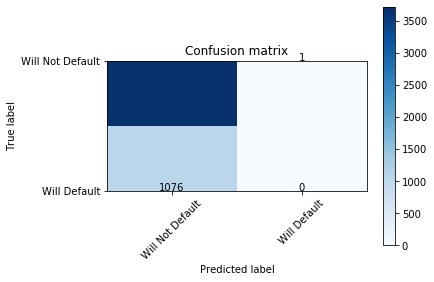

In [14]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)